# Challenge: Classifying breast cancer tumours using Machine Learning

**Shannon Houtermans**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('E:\Gebruikers\\Shannon\\Downloads\\breast-cancer.csv', sep = ',')

# Project Proposal

## 1. Introduction

In this challenge, I want to research the possibility of classifying tumours found in patients diagnosed with breast cancer. Specifically, I want to find out whether a machine learning algorithm can accurately predict whether a tumour is malignant (cancerous) or benign(non-cancerous), using the properties of tumours from the *Breast Cancer Dataset (https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset)* from Kaggle.

For this, I will try to apply the knowledge that I have gained at the beginning of this semester and create a cohesive document in which I will demonstrate what I'm going to research, what steps I will be taking to perform the research, and what the results of the research will be.

***

## 2. Domain Understanding

### What is cancer?
According to Stanford Medicine, the definition of a cancer is a follows<sup>1</sup>:
> Cancer is an abnormal growth of cells. Cancer cells rapidly reproduce despite restriction of space, nutrients shared by other cells, or signals sent from the body to stop reproduction. Cancer cells are often shaped differently from healthy cells, they do not function properly, and they can spread to many areas of the body. Tumors, abnormal growth of tissue, are clusters of cells that are capable of growing and dividing uncontrollably; their growth is not regulated.

Tumours are divided between benign and malignant. Benign tumours grow slowly and do not spread, and are therefore easier and less destructive to remove. Malignant tumours on the other hand grow rapidly and tend to spread, invading and destroying tissue either locally (locally invasive) or by sending cancer cells to other tissue in the body (metastatic).

In 2020, 18.1 million people globally were diagnosed with cancer cases<sup>2</sup>.

### Breast cancer
Breast cancer is the most common type of cancer diagnosed among women. According to statistics from the World Health Organisation, 2.3 million women were diagnosed globally with breast cancer, with 685.000 women dying due to complications caused by breast cancer in that same year<sup>3</sup>. This puts the the global average mortality rate of breast cancer in the ballpark of about 30%, and is listed by Cancer Research UK as the second most deadly form of cancer, with lung cancers being the deadliest<sup>4</sup>.

***

## 3. Data Sourcing

### Data Completeness
Before we can feed the dataset into a model to predict the tumour classification, we have to find out whether the data is complete. Incomplete data can cause the model to produce errors or skewed results. In order to find out whether the data is complete, we sum up the amount of NA values per column.

In [2]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

From the above results, we can see that there are 0 NA values in all columns, meaning that our data is complete.

### Data Types
The next step would be to determine whether the data is provided in the right format. For example, we cannot do calculations with numbers formatted as a string. Therefore we use the `dtypes` function to determine the data type of each column.

In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The results above tell us that the identifying column is an integer, and the diagnosis column is a string. All other columns are floating point values. Seeing as most of the values in these columns have decimal points, this is a suitable data type to store the values in.

### Correlation
In order to find out how much correlation there is between the different columns, we can use Seaborn's Heatmap function to calculate and visualise the correlation on a spectrum of colours. 

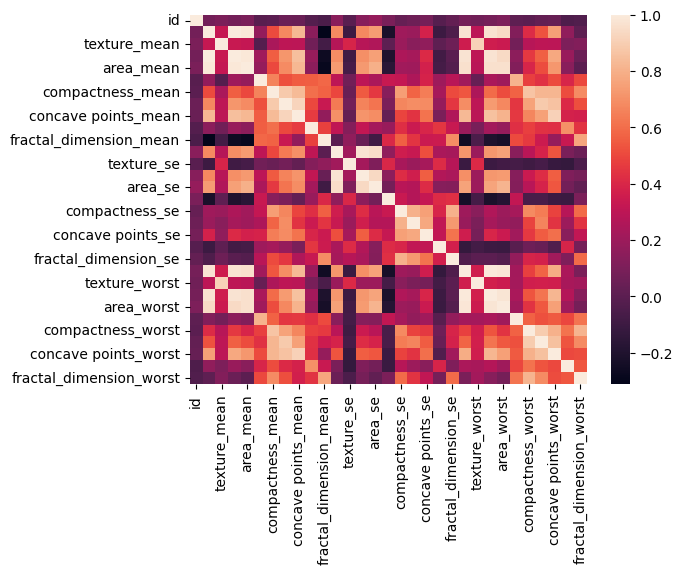

In [4]:
sns.heatmap(df.corr());

The heatmap above shows all the columns and therefore looks a little convoluted. We can also see a pattern in the heatmap due to the repeated occurence of similar columns. As there is visually little difference between these re-occuring patterns, we can try to zoom in on just the columns with the **mean** values.

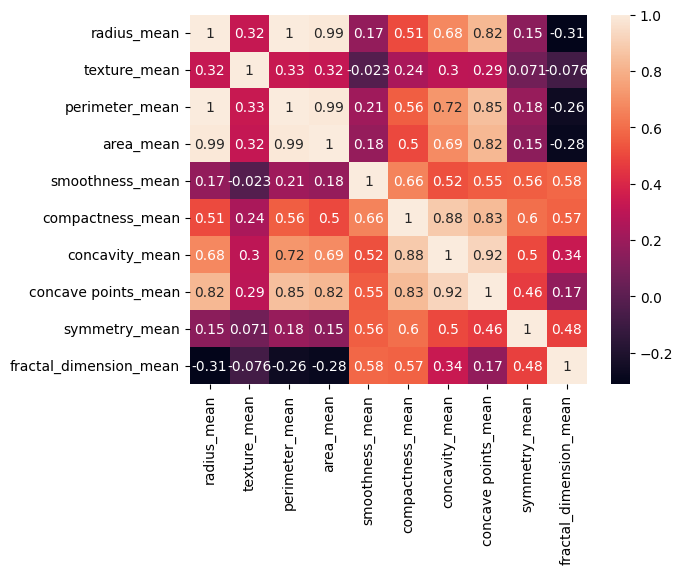

In [5]:
df1 = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']]

sns.heatmap(df1.corr(),annot=True);

From the heatmap above, we can see that there are multiple columns correlated with each other, indicating that there are strong linear relationships, both positive and negative. This means that changes in the data influence each other and can be used to make predictions with. 

### Conclusion
To conclude, I believe that the data is complete enough and of the right data type to be used for machine learning. With 32 columns and 569 rows, I think that we have enough data to try and predict the breast cancer classification.

***

## 4. Analytical Approach

### *Why* is research into machine learning for predicting breast cancer classification needed?
In traditional methods for determining the type of tumour that causes cancer, a patient will have a *biopsy* taken by a doctor, which will then be analysed by medical professionals. A biopsy is a procedure where sample tissue is taken from the affected part of the body, and then analysed in a laboratory to determine whether the tumour is benign or malignant. A biopsy takes between 15 and 30 minutes, and the results of the biopsy are either ready as soon as 2 days, or it may take as long as 10 days<sup>6</sup>.

If it is possible to use machine learning to get a highly accurate prediction from a tumour scan on whether the tumour is benign of malignant, it can significantly shorten the time and effort needed to make a diagnosis, and could allow for malignant breast cancer to be detected much faster during annual breast cancer checkups, which increases the chances of survival for the patient diagnosed with breast cancer. 

### *What* will we do in order to train an algorithm to predict breast cancer classification?
1. First, it is important that we understand the topic that we want to perform research on, and that we can find data on the topic at hand that is usable to use in machine learning. This data has to be complete, and in cases where it might not contain all the information that we need, we have to add the data from other sources as well.
2. Then, we have to import the data and clean it where necessary, in order to make the algorithm be able to intepret the data correctly. Therefore it is necessary to understand the data by knowing what the values represent and how they are represented in the dataframe. 
3. Once we have cleaned the data, we can finally feed the values into the chose ML algorithm. We need to select the type of algorithm that is most suitable to make the classification prediction (the *AI Project Methodology* document recommends the usage of Nearest Neighbours) and make sure that the data is fitted correctly. In the course of making the predictions, we can try and adjust other variables to see whether we can get a consistently more accurate result.
4. Finally, when we are satisfied (or not) with the results from our algorithm, we need to be able to demonstrate what we did to receive the results from the algorithm, and collect the necessary feedback to improve and reflect on the project, and make adjustments where necessary.

### *Who* will be responsible for executing this project?
This project is meant to be an individual project, and therefore I will be the only person responsible for carrying out and delivering the project. I will stay in contact with my tutors (Mr Welman, Mrs Zhao, and Mrs Pencheva) for feedback, questions, and status updates

### *When* will the project be carried out?
Due to private circumstances that have hindered me from working on school-related tasks, I will hand in my project proposal in *week 6*. Then, if my proposal will be approved in *week 7*, I will work on my project till the delivery of the final iteration in *week 12*.
* Week 7 will be used to improve upon Phase 1 (Proposal) from the feedback that I receive.
* Week 8 and 9 will be used to work on Phase 2 (Provisioning) of the project.
* Week 10 and 11 will be used to work on Phase 3 (Predictions) of the project.
* Week 12 will be used for Phase 4 (Delivery) of the project, where I will hand in my final iteration.

My goal is to collect feedback during these phases and try to finish each phase before the allocated weeks, so that there will be plenty of time for improvements.

### *How* will we execute the project?
This project will be done using Python, as it is a widely used programming language in the machine learning community, and provides support for many machine learning algorithms to be used in Python. Python is also a relatively easy programming language to learn and has a lot of documentation that can be used to find help on certain topics.
To document and report the steps and findings of the project, we will use Jupyter Notebook as it has integrated visualisation and markdown features, and is a widely recommended computing platform in the ML community. 

We will use the following python libraries:
* **NumPy** to support loading dataframes into Python.
* **Pandas** to be able to manipulate dataframes.
* **Seaborn** to visualise our data.
* **Scikit-learn** to provide machine learning algorithms for us to use.

***

# Data Provisioning

## 1. Data Requirements

To be able to collect the right data, I have to make sure that I understand where I have to retrieve it from. There is no use in collecting data that does not come from a reliable source, as there is a chance that this data is not accurate (anymore). 

### Sources
As the domain of breast cancer is almost wholly related to the overarching domain of healthcare, it would be preferable to use data originating from hospitals or medical specialists who have collected data on tumours found in breast cancer. This limits the amount of sources which can be utilised quite substantially, but this is not surprising as the domain itself is also quite limited in scope.

### Stakeholders
Performing research on this topic raises the question of whom would potentially benefit from the usage or storage of this data? We can think of several stakeholders who would have stakes in publishing this data publically:
* **Medical specialists**: Medical specialists who have performed the research and collected the results benefit from publishing their these, as it enables the scientific and medical community to evaluate the findings themselves. It allows other people to repeat or build on these results and confirm the findings themselves.
* **Breast cancer patients**: Breast cancer patients can potentially benefit from storing this data as it allows other researchers to analyse the data and potentially find ways to make the classification of breast cancer tumours easier and faster, resulting in higher chances of survival as the cancer can be treated more rapidly.

### Data Elements
The data that will be used to carry out this research is the *Breast Cancer Dataset* retrieved from **Kaggle**. Kaggle is a subsidiary company of **Google** which allows users to find and publish datasets for use in data science<sup>7</sup>. When we dig deeper, we find that the data originates from diagnosed cases collected by Dr. William H. Wolberg for the University of Wisconsin Hospitals in 1992. The University of Wisconsin Hospitals is an academic hospital in Madison, Wisconsin, United States of America, which can be assumed to be a reliable source of data to be used for serious ML application.

The dataset consists of 32 columns and 569 columns. Columns 3 till 32 are divided between the **mean** of the data, the **standard error** of the data, and the **worst value** of the data. It is provided as a CSV file and contains the following important data:
1. `ID`: The unique identification number of the diagnosed case.
2. `Diagnosis`: The general diagnosis made by a medical professional, classified by 'M' (malignant) and 'B' (benign).
3. `Radius`: The distances from centre to points on the perimeter.
4. `Texture`: The standard deviation of greyscale values.
5. `Perimeter`: The measurements of the tumour perimeter.
6. `Area`: The area measurements of the tumour.
7. `Smoothness`: The local variation in radius lengths.
8. `Compactness`: The tumour's compactness measurements calculated by `perimeter^2 / area - 1.0`.
9. `Concavity`: The severities of concave portions of the contour.
10. `Concave points`: The number of concave portions of the contour.
11. `Symmetry`: The degree of symmetry of the tumour.
12. `Fractal dimension`: The result of `"coastline approximation" - 1`.

***

## 2. Data Collection

### Collecting information
The topic of this research has been selected based on an already-provided dataset, and the current dataset already contains all of the data that we need for the scope of this project. I have not been able to find any more data that could enhance the dataset I already have, and therefore I feel that there is little need to source more data. 

### Storing data
In storing the data used for this research, I set the following criteria in trying to find the right hosting environment:
* **Accessibility.** The data should be able to be accessed at any time and place.
* **Practicality.** Storing and retrieving the data should be as easy as possible.
* **Version control.** The hosting environment should keep notes of the different versions of data.

At first, I used Google Drive due to my familiarity with the platform. However, I realised that Google Drive is not a very transparent service to store data, so I ended up switching to GitHub. While I am less familiar with this platform, I do think that it is more beneficial for my data to be publicly available.

### Extracting data
Due to the limited scope of the project, the data to be used will be extracted from a .csv file. Currently I have no plans to connect the data to the internet by means of an online database or API, as the data that I will use is already publicly available, and I doubt whether I will change much of the data already provided in the dataset. Furthermore, as my data is only meant to showcase the potential of machine learning, there would be little use in retrieving the data for practical purposes.

***

## 3. Data Understanding

### Exploratory Data Analysis


In [8]:
df1.shape

(569, 10)

In [6]:
df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


***

## 4. Data Preparation

***

# Predictions

## 1. Preprocessing

***

## 2. Modelling

***

## 3. Evaluation

***

## References
1. *Cancer*. (n.d.). Stanford Health Care. Retrieved October 6, 2022, from https://stanfordhealthcare.org/medical-conditions/cancer/cancer.html
2. WCRF International. (2022b, April 14). *Worldwide cancer data*. Retrieved October 6, 2022, from https://www.wcrf.org/cancer-trends/worldwide-cancer-data/
3. *Breast cancer*. (2021, March 26). World Health Organisation. Retrieved October 6, 2022, from https://www.who.int/news-room/fact-sheets/detail/breast-cancer
4. Cancer Research UK. (2022, July 6). *Cancer mortality for common cancers*. Retrieved October 6, 2022, from https://www.cancerresearchuk.org/health-professional/cancer-statistics/mortality/common-cancers-compared
5. *UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set*. (n.d.). Retrieved October 6, 2022, from http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29
6. *Biopsy*. (2022, June 2). Cancer.Net. Retrieved October 8, 2022, from https://www.cancer.net/navigating-cancer-care/diagnosing-cancer/tests-and-procedures/biopsy
7. Wikipedia contributors. (2022, October 28). *Kaggle*. Wikipedia. https://en.wikipedia.org/wiki/Kaggle